We will use the daily spreadsheet from EU CDC containing new cases per country per day.

In [1]:
!rm COVID-19-geographic-disbtribution-worldwide.xlsx
!wget https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2020-04-08 11:44:56--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 99.86.116.79, 99.86.116.21, 99.86.116.78, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|99.86.116.79|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 412365 (403K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘COVID-19-geographic-disbtribution-worldwide.xlsx’

COVID-19-geographic 100%[===================>] 402.70K  --.-KB/s    in 0.06s   

2020-04-08 11:44:56 (6.44 MB/s) - ‘COVID-19-geographic-disbtribution-worldwide.xlsx’ saved [412365/412365]



Get Pandas and NumPy for feature engineering and calculations and get plots inline.

In [2]:
import pandas as pd
import numpy as np

%matplotlib inline

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format.

In [3]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx')
df.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,2020-04-08,8,4,2020,30,4,Afghanistan,AF,AFG,37172386.0
1,2020-04-07,7,4,2020,38,0,Afghanistan,AF,AFG,37172386.0
2,2020-04-06,6,4,2020,29,2,Afghanistan,AF,AFG,37172386.0
3,2020-04-05,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0
4,2020-04-04,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0
5,2020-04-03,3,4,2020,43,0,Afghanistan,AF,AFG,37172386.0
6,2020-04-02,2,4,2020,26,0,Afghanistan,AF,AFG,37172386.0
7,2020-04-01,1,4,2020,25,0,Afghanistan,AF,AFG,37172386.0
8,2020-03-31,31,3,2020,27,0,Afghanistan,AF,AFG,37172386.0
9,2020-03-30,30,3,2020,8,1,Afghanistan,AF,AFG,37172386.0


Use a count on columns to see how many missing values we have. We would like to compare countries by geoId.

In [4]:
df.count()

dateRep                    9513
day                        9513
month                      9513
year                       9513
cases                      9513
deaths                     9513
countriesAndTerritories    9513
geoId                      9488
countryterritoryCode       9324
popData2018                9370
dtype: int64

Because we seem to miss some geoID entries, we will drop them. The resulting dataframe will be pivoted so we get one row per date, columns by geoId and the number of new cases in the cells. Again, show the first 10 rows to check our pivot.

In [5]:
df_geo = df.dropna().pivot(index = 'dateRep', columns = 'geoId', values = 'cases')
df_geo.head(10)

geoId,AD,AE,AF,AG,AL,AM,AO,AR,AT,AU,...,VA,VC,VE,VG,VI,VN,XK,ZA,ZM,ZW
dateRep,,,,,,,,,,,,,,,,,,,,,
2019-12-31,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2020-01-01,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2020-01-02,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2020-01-03,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2020-01-04,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2020-01-05,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2020-01-06,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2020-01-07,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2020-01-08,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


Looking good, lots of missing values, meaning there's no data for that country on the current date. We can describe the columns to see what's there.

In [6]:
df_geo.describe()

geoId,AD,AE,AF,AG,AL,AM,AO,AR,AT,AU,...,VA,VC,VE,VG,VI,VN,XK,ZA,ZM,ZW
count,26.000000,94.000000,90.000000,20.000000,31.000000,91.000000,18.000000,33.000000,100.000000,100.000000,...,25.000000,16.000000,25.000000,13.000000,15.000000,96.000000,24.000000,32.000000,21.000000,19.000000
mean,20.961538,25.095745,4.077778,0.750000,12.354839,9.373626,0.944444,51.969697,126.400000,59.560000,...,0.280000,0.500000,6.640000,0.230769,3.000000,2.614583,7.666667,54.656250,1.857143,0.526316
std,14.055549,79.740583,9.864507,1.618154,8.619932,19.373893,1.211330,53.950489,241.085885,128.404925,...,0.842615,1.264911,10.379788,0.599145,4.644505,6.654432,9.590152,62.431697,3.260149,0.696692
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.500000,0.000000,0.000000,0.000000,4.500000,0.000000,0.000000,7.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,10.000000,0.000000,0.000000
50%,23.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.500000,31.000000,0.000000,1.000000,...,0.000000,0.000000,3.000000,0.000000,2.000000,0.000000,5.500000,32.500000,0.000000,0.000000
75%,34.000000,2.000000,0.750000,0.250000,17.000000,7.000000,1.750000,87.000000,145.000000,43.000000,...,0.000000,0.250000,10.000000,0.000000,3.000000,3.250000,8.000000,72.500000,2.000000,1.000000
max,43.000000,481.000000,43.000000,6.000000,29.000000,92.000000,4.000000,186.000000,1141.000000,611.000000,...,4.000000,5.000000,48.000000,2.000000,17.000000,54.000000,39.000000,243.000000,12.000000,2.000000


Get to know your data by visualization, in this case the number of new cases per day for my home country.

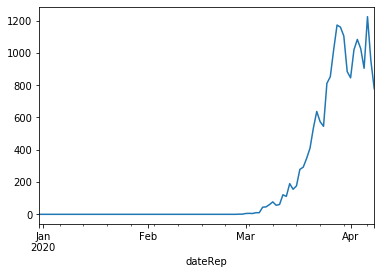

In [7]:
df_geo['NL'].plot()

What would China look like?

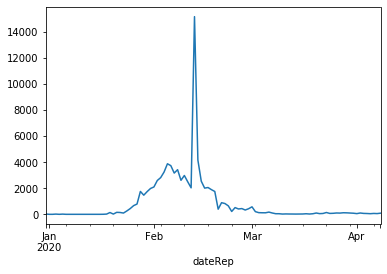

In [8]:
df_geo['CN'].plot()

The big spike in the middle was a change in counting, where they decided to count an extra 15000 cases.

To see the growth in number of cases, we can use cumulative sum, in this case we show CN and NL.

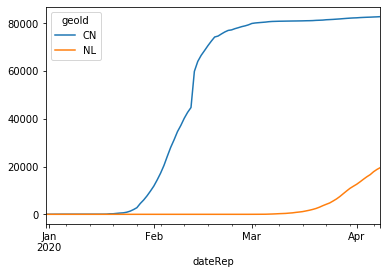

In [9]:
df_geo[['CN', 'NL']].cumsum().plot()

Because of the large difference in numbers, it may help to use a logarithmic scale.

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


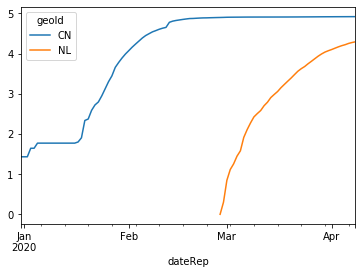

In [10]:
np.log10(df_geo[['CN', 'NL']].cumsum()).plot()

This clearly shows the phases in CN, first some external infections, then an incubation period, then the internal infections take off. Measures like isolation and social distancing seem to work, the curve flattens and stabilizes. For NL we are still at the phase where measures start to take effect. Also, no real startup curve there.

Perhaps some other countries also show this effect.

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


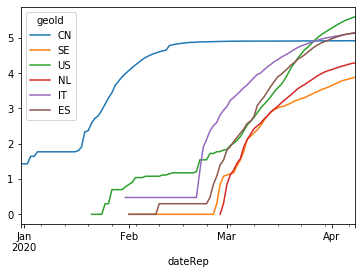

In [11]:
np.log10(df_geo[['CN', 'SE', 'US', 'NL', 'IT', 'ES']].cumsum()).plot()

Another interesting measure would be relative growth in number of cases per day. Therefore we need to divide the current day by the previous one, easily implemented by dividing the dataframe by the same dataframe shifted one row. Note that we are now only showing data from March 16 onwards, as specified by the loc method.

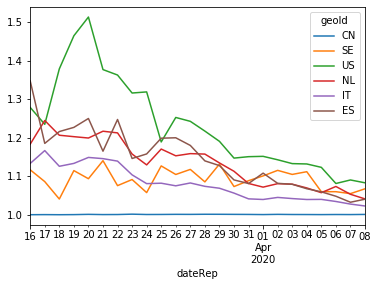

In [12]:
(df_geo.cumsum() / df_geo.shift().cumsum())[['CN', 'SE', 'US', 'NL', 'IT', 'ES']].loc['20200316':].plot()

From this factor (relative increase in cases since yesterday) we can calculate the number of days to double by some logarithmic magic. For NL the number doubled every one or two days in the beginning but now it doubles in over ten days, which is a good sign.

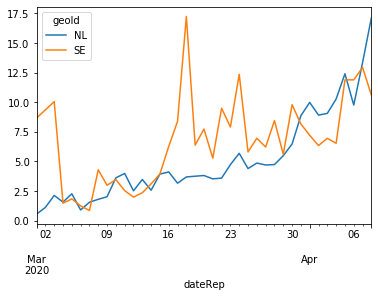

In [13]:
(np.log10(2) / np.log10(df_geo.cumsum() / df_geo.shift().cumsum()))[['NL', 'SE']].loc['20200301':].plot()

Rolling window functions can be used to smooth a curve, in this case the moving 5 day mean new cases for NL.

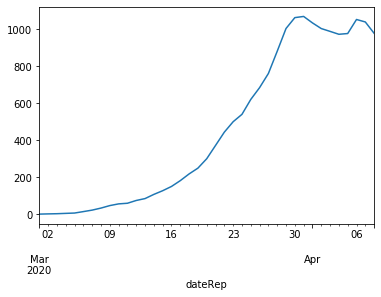

In [18]:
df_geo['NL'].rolling(5).mean().loc['20200301':].plot()

Let's look at 'the curve' which we are supposed to flatten. We assume that an infection lasts 15 days on average (which is under discussion, but currently used by EU CDC), so we only sum new cases from the last 15 days. By leaving out older infections this shows us the current number of infections. China is clearly through their (first) curve.

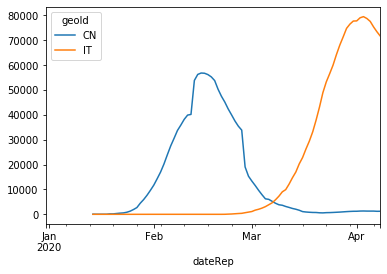

In [15]:
df_geo[['CN', 'IT']].rolling(15).sum().plot()

Assuming that we see about 10% of currently infected in ICU, we can monitor the capacity with the following graph.

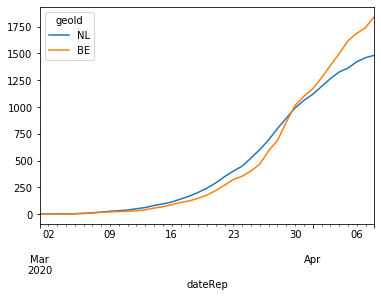

In [16]:
(df_geo[['NL', 'BE']].rolling(15).sum().loc['20200301':] / 10).plot()

For NL this corresponds with the official ICU data, for BE it overestimates a bit.

Keep exploring! Stay home, wash your hands, keep your distance.